# Sentiment Analysis using Deep Learning in Keras

### Importing Required Libraries

In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from numpy import array, asarray, zeros
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Flatten, GlobalMaxPooling1D
from keras.layers.core import Activation, Dropout, Dense
from keras.layers.embeddings import Embedding
import matplotlib.pyplot as plt
from keras.layers import Conv1D
from keras.layers import LSTM

### Importing Dataset

Dataset 1 link: https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset 2 link: https://github.com/vineetdhanawat/twitter-sentiment-analysis/blob/master/datasets/Sentiment%20Analysis%20Dataset%20100000.csv

In [2]:
df = []
df.append(pd.read_csv('IMDB Dataset.csv', nrows = 10000))
df.append(pd.read_csv('Sentiment Analysis Dataset 100000.csv', encoding = 'latin-1', nrows = 10000))
df[1].drop(['ItemID'], axis = 'columns', inplace = True)

In [3]:
df[0].head(5)

,text,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df[1].head(5)

,sentiment,text
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...


In [5]:
df[0]['text'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [6]:
df[1]['text'][0]

'                     is so sad for my APL friend.............'

In [7]:
for i in df:
    print(i.isnull().values.any())

False
False


<AxesSubplot:xlabel='sentiment', ylabel='count'>

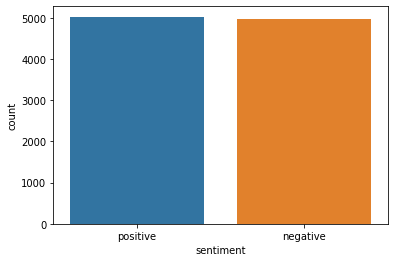

In [8]:
sns.countplot(x = 'sentiment', data = df[0])

<AxesSubplot:xlabel='sentiment', ylabel='count'>

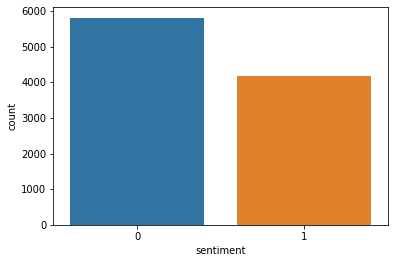

In [9]:
sns.countplot(x = 'sentiment', data = df[1])

## Data Processing

#### Dataset 1 Cleaning

In [10]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_html_tags(sen):
    return TAG_RE.sub('', sen)

In [11]:
def data_processing_1(sen):
    sen = remove_html_tags(sen) # remove html tag
    sen = sen.replace('n\'t', ' not') # convert n't to not
    sen = re.sub(r"\s+[a-zA-Z]\s+", ' ', sen) # remove single letter
    sen = re.sub(r'\s+', ' ', sen) # remove multiple spaces
    sen = re.sub(r'[.]+', '.', sen) # remove multiple dots
    sen = sen.replace('\\\'', ' ') # remove \
    return sen

In [12]:
X = [["0"]*10000]*3

In [13]:
X

[['0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',

In [14]:
sentences = list(df[0]['text'])
i = 0

for sen in sentences:
    X[0][i] = data_processing_1(sen)
    i = i + 1

X[0] = np.array(list(X[0]))

In [15]:
for i in range(0, 3):
    print(X[0][i], end = '\n\n')

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many.Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more.so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows would not

In [16]:
y = [[0]*10000]*3
y[0] = df[0]['sentiment']
y[0] = np.array(list(map(lambda x: 1 if x == "positive" else 0, y[0])))

In [17]:
for i in range(0, 5):
    print(y[0][i], end = ', ')

1, 1, 1, 0, 1, 

In [18]:
print(np.shape(X[0]))
print(np.shape(y[0]))

(10000,)
(10000,)


#### Dataset 2 Cleaning

In [19]:
def data_processing_2(sen):
    sen = sen.replace('&quot;3', '')
    sen = sen.replace('&quot;', '')
    sen = sen.replace('&lt;3', '')
    sen = sen.replace('&lt;', '')
    sen = sen.replace('&gt;', '')
    sen = re.sub('http[s]?://\S+', '', sen)
    sen = re.sub('[a-zA-Z0-9]*@[a-zA-Z0-9]*', '', sen)
    sen = sen.replace('an\'t', 'an not')
    sen = sen.replace('n\'t', ' not')
    sen = re.sub(r"\s+[A-Z]\s+", ' ', sen)
    sen = re.sub(r'[.]+', '.', sen)
    sen = re.sub(r'\s+', ' ', sen)
    sen = re.sub(r'[-]+', ' ', sen)
    return sen

In [20]:
sentences = list(df[1]['text'])
i = 0

for sen in sentences:
    X[1][i] = data_processing_2(sen)
    i = i + 1
    
X[1] = np.array(list(X[1]))

In [21]:
y[1] = np.array(list(df[1]['sentiment']))

In [22]:
for i in range(0, 10):
    print(y[1][i], end = ',')

0,0,1,0,0,0,1,0,1,1,

In [23]:
print(np.shape(X[1]))
print(np.shape(y[1]))

(10000,)
(10000,)


#### Combine Dataset

In [24]:
for i in range(0, 5000):
    X[2][i] = X[0][i]
    y[2][i] = y[0][i]
for i in range(5000, 10000):
    X[2][i] = X[1][i]
    y[2][i] = y[1][i]
    
X[2] = np.array(X[2])
y[2] = np.array(y[2])

In [25]:
print(np.shape(X[2]))
print(np.shape(y[2]))

(10000,)
(10000,)


In [26]:
for sen in range(0, 3):
    print(y[2][sen], X[2][sen], end = '\n\n')
for sen in range(5000, 5003):
    print(y[2][sen], X[2][sen], end = '\n\n')

1 One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many.Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more.so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows would n

#### Dataset splitting to train and test

In [27]:
X_train = [[]] * 3
X_test = [[]] * 3
y_train = [[]] * 3
y_test = [[]] * 3

In [28]:
for i in range(0, 3):
    print('dataset ', i+1, ': ', np.shape(X[i]), ', ', np.shape(y[i]), end = '\n')

dataset  1 :  (10000,) ,  (10000,)
dataset  2 :  (10000,) ,  (10000,)
dataset  3 :  (10000,) ,  (10000,)


In [29]:
for i in range(0, 3):
    X_train[i], X_test[i], y_train[i], y_test[i] = train_test_split(
        X[i], y[i], test_size = 0.25,
        random_state = 42
    )

In [30]:
for i in range(0, 10):
    print(i, ': ', y_test[1][i], ' --> ', X_train[1][i])

0 :  0  -->  #f1 Rubens knows he has lost any chance of the world championship
1 :  0  -->  #3turnoffwords   Isit in yet
2 :  1  -->  #FollowFriday is a ferociously gifted writer whose books &amp; Tweets are magical must reads. Follow &amp; you'll LOVE her too
3 :  0  -->  My heart sings when think of youuu haha that's all keep singing today. I'm craving cheeto puffs unhealthy!
4 :  0  -->   guys are pricks. gonna have an early night and cry til i fall asleep. fuck you all.
5 :  1  -->  #faviphoneapp Black Book. But since only have a Touch it's not as fun. But it's still a great junt organizer
6 :  0  -->  #musicmonday Crossfire   On Fire
7 :  1  -->  #3wordsaftersex 'I broke it?!?!' lol
8 :  0  -->  ! .sooo, any hope for a match up with Liz Cheney and Mikas Daddy? thx!! Ratings Gold I'm sure!! 
9 :  0  -->   u guys knw whyy


### Preparing Embedding Layer

In [31]:
tokenizer = Tokenizer(num_words = 50000)

for i in range(3):
    tokenizer.fit_on_texts(X_train[i])

In [32]:
for i in range(3):
    X_train[i] = tokenizer.texts_to_sequences(X_train[i])

In [33]:
for i in range(3):
    X_test[i] = tokenizer.texts_to_sequences(X_test[i])

In [34]:
maxlen = 100
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

57961


In [35]:
for i in range(3):
    X_train[i] = pad_sequences(
        X_train[i],
        padding = 'post',
        maxlen = maxlen
    )

In [36]:
for i in range(3):
    X_test[i] = pad_sequences(
        X_test[i],
        padding = 'post',
        maxlen = maxlen
    )

#### glove.6B.100d.txt Dataset for GloVe Embedding

dataset link: https://www.kaggle.com/danielwillgeorge/glove6b100dtxt

In [37]:
embed_dictionary = dict()
glv_file = open('glove.6B.100d.txt', encoding='utf8')

In [38]:
for line in glv_file:
    records = line.split()
    word = records[0]
    vector_dim = asarray(records[1:], dtype='float32')
    embed_dictionary[word] = vector_dim
glv_file.close()

In [39]:
embed_matrix = zeros((vocab_size, 100))

In [40]:
embed_matrix[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [41]:
for word, index in tokenizer.word_index.items():
    embed_vector = embed_dictionary.get(word)
    if embed_vector is not None:
        embed_matrix[index] = embed_vector

In [42]:
embed_matrix[1]

array([-0.038194  , -0.24487001,  0.72812003, -0.39961001,  0.083172  ,
        0.043953  , -0.39140999,  0.3344    , -0.57545   ,  0.087459  ,
        0.28786999, -0.06731   ,  0.30906001, -0.26383999, -0.13231   ,
       -0.20757   ,  0.33395001, -0.33848   , -0.31742999, -0.48335999,
        0.1464    , -0.37303999,  0.34577   ,  0.052041  ,  0.44946   ,
       -0.46970999,  0.02628   , -0.54154998, -0.15518001, -0.14106999,
       -0.039722  ,  0.28277001,  0.14393   ,  0.23464   , -0.31020999,
        0.086173  ,  0.20397   ,  0.52623999,  0.17163999, -0.082378  ,
       -0.71787   , -0.41531   ,  0.20334999, -0.12763   ,  0.41367   ,
        0.55186999,  0.57907999, -0.33476999, -0.36559001, -0.54856998,
       -0.062892  ,  0.26583999,  0.30204999,  0.99774998, -0.80480999,
       -3.0243001 ,  0.01254   , -0.36941999,  2.21670008,  0.72201002,
       -0.24978   ,  0.92136002,  0.034514  ,  0.46744999,  1.10790002,
       -0.19358   , -0.074575  ,  0.23353   , -0.052062  , -0.22

## Text Classification with Simple Neural Network

In [43]:
model = Sequential()
embed_layer = Embedding(
    vocab_size, 100,
    weights = [embed_matrix],
    input_length = maxlen,
    trainable = False
)
model.add(embed_layer)
model.add(Flatten())

In [44]:
model.add(
    Dense(
        1,
        activation = 'sigmoid'
    )
)

In [45]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          5796100   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 10001     
Total params: 5,806,101
Trainable params: 10,001
Non-trainable params: 5,796,100
_________________________________________________________________


In [47]:
hist = [[]] * 3

for i in range(3):
    hist[i] = model.fit(
        X_train[i], y_train[i],
        batch_size = 128,
        epochs = 6,
        verbose = 1,
        validation_split = 0.2
    )

Epoch 1/6
47/47 [==============================] - 0s 7ms/step - loss: 0.6803 - acc: 0.5865 - val_loss: 0.6259 - val_acc: 0.6553
Epoch 2/6
47/47 [==============================] - 0s 5ms/step - loss: 0.5226 - acc: 0.7525 - val_loss: 0.5895 - val_acc: 0.6947
Epoch 3/6
47/47 [==============================] - 0s 6ms/step - loss: 0.4426 - acc: 0.8135 - val_loss: 0.5769 - val_acc: 0.6980
Epoch 4/6
47/47 [==============================] - 0s 6ms/step - loss: 0.3857 - acc: 0.8547 - val_loss: 0.5823 - val_acc: 0.6953
Epoch 5/6
47/47 [==============================] - 0s 5ms/step - loss: 0.3540 - acc: 0.8692 - val_loss: 0.5600 - val_acc: 0.7120
Epoch 6/6
47/47 [==============================] - 0s 6ms/step - loss: 0.3156 - acc: 0.8975 - val_loss: 0.5702 - val_acc: 0.7053
Epoch 1/6
47/47 [==============================] - 0s 6ms/step - loss: 0.6447 - acc: 0.6280 - val_loss: 0.6215 - val_acc: 0.6593
Epoch 2/6
47/47 [==============================] - 0s 5ms/step - loss: 0.5994 - acc: 0.6825 - val

In [48]:
loss = [[]] * 3
acc = [[]] * 3

for i in range(3):
    loss[i], acc[i] = model.evaluate(
        X_train[i], y_train[i],
        verbose = 1
    )

for i in range(3):
    print('\ndataset {}: loss - {}, acc - {}'.format(i+1, loss[i], acc[i]))

235/235 [==============================] - 0s 2ms/step - loss: 0.3828 - acc: 0.8500

dataset 1: loss - 0.3588232398033142, acc - 0.8530666828155518

dataset 2: loss - 0.5555294752120972, acc - 0.7298666834831238

dataset 3: loss - 0.3827632665634155, acc - 0.8500000238418579


In [49]:
loss = [[]] * 3
acc = [[]] * 3

for i in range(3):
    loss[i], acc[i] = model.evaluate(
        X_test[i], y_test[i],
        verbose = 1
    )
    
for i in range(3):
    print('\ndataset {}: loss - {}, acc - {}'.format(i+1, loss[i], acc[i]))

79/79 [==============================] - 0s 2ms/step - loss: 0.6605 - acc: 0.6716

dataset 1: loss - 0.6778039336204529, acc - 0.692799985408783

dataset 2: loss - 0.6303901076316833, acc - 0.6639999747276306

dataset 3: loss - 0.6605290174484253, acc - 0.6715999841690063


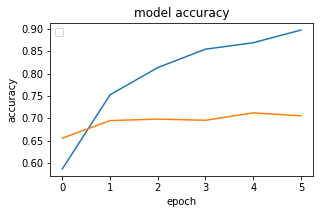

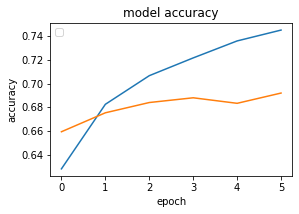

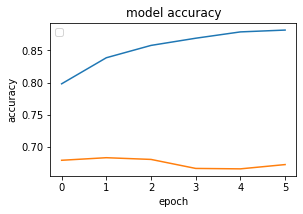

In [50]:
for i in range(3):
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, i+1)
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'test'], loc = 'upper left')
    plt.plot(hist[i].history['acc'])
    plt.plot(hist[i].history['val_acc'])
    plt.tight_layout(pad=1.0)

plt.show()

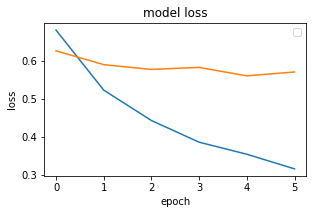

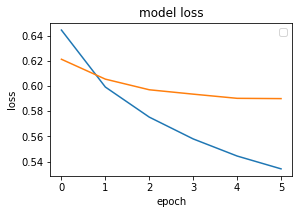

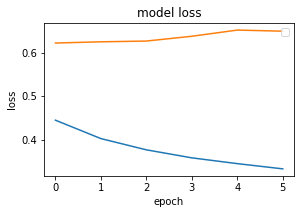

In [51]:
for i in range(3):
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, i+1)
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'test'], loc = 'upper right')
    plt.plot(hist[i].history['loss'])
    plt.plot(hist[i].history['val_loss'])
    plt.tight_layout(pad=1.0)

plt.show()

## Text Classification with CNN

In [52]:
model = Sequential()

embed_layer = Embedding(
    vocab_size, 100,
    weights = [embed_matrix],
    input_length = maxlen,
    trainable = False
)
model.add(embed_layer)

In [53]:
model.add(
    Conv1D(128, 5,
        activation = 'relu'
    )
)
model.add(GlobalMaxPooling1D())
model.add(
    Dense(1,
          activation = 'sigmoid'
    )
)

In [54]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          5796100   
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 5,860,357
Trainable params: 64,257
Non-trainable params: 5,796,100
_________________________________________________________________


In [56]:
hist = [[]] * 3

for i in range(3):
    hist[i] = model.fit(
        X_train[i], y_train[i],
        batch_size = 128,
        epochs = 6,
        verbose = 1,
        validation_split = 0.2
    )

Epoch 1/6
47/47 [==============================] - 4s 75ms/step - loss: 0.6544 - accuracy: 0.6195 - val_loss: 0.5749 - val_accuracy: 0.7093
Epoch 2/6
47/47 [==============================] - 3s 70ms/step - loss: 0.5118 - accuracy: 0.7758 - val_loss: 0.4996 - val_accuracy: 0.7733
Epoch 3/6
47/47 [==============================] - 3s 74ms/step - loss: 0.4254 - accuracy: 0.8340 - val_loss: 0.4578 - val_accuracy: 0.7887
Epoch 4/6
47/47 [==============================] - 3s 74ms/step - loss: 0.3652 - accuracy: 0.8733 - val_loss: 0.4324 - val_accuracy: 0.8100
Epoch 5/6
47/47 [==============================] - 3s 72ms/step - loss: 0.3189 - accuracy: 0.8958 - val_loss: 0.4151 - val_accuracy: 0.8133
Epoch 6/6
47/47 [==============================] - 4s 75ms/step - loss: 0.2814 - accuracy: 0.9120 - val_loss: 0.4105 - val_accuracy: 0.8140
Epoch 1/6
47/47 [==============================] - 3s 71ms/step - loss: 0.6389 - accuracy: 0.6732 - val_loss: 0.5720 - val_accuracy: 0.7100
Epoch 2/6
47/47 [===

In [57]:
loss = [[]] * 3
acc = [[]] * 3

for i in range(3):
    loss[i], acc[i] = model.evaluate(
        X_train[i], y_train[i],
        verbose = 1
    )

for i in range(3):
    print('\ndataset {}: loss - {}, acc - {}'.format(i+1, loss[i], acc[i]))

235/235 [==============================] - 2s 8ms/step - loss: 0.2018 - accuracy: 0.9441

dataset 1: loss - 0.23759202659130096, acc - 0.9130666851997375

dataset 2: loss - 0.3270639181137085, acc - 0.873199999332428

dataset 3: loss - 0.20183543860912323, acc - 0.9441333413124084


In [58]:
loss = [[]] * 3
acc = [[]] * 3

for i in range(3):
    loss[i], acc[i] = model.evaluate(
        X_test[i], y_test[i],
        verbose = 1
    )
    
for i in range(3):
    print('\ndataset {}: loss - {}, acc - {}'.format(i+1, loss[i], acc[i]))

79/79 [==============================] - 1s 9ms/step - loss: 0.5296 - accuracy: 0.7476

dataset 1: loss - 0.4515243172645569, acc - 0.7864000201225281

dataset 2: loss - 0.6189744472503662, acc - 0.7075999975204468

dataset 3: loss - 0.5295751690864563, acc - 0.7476000189781189


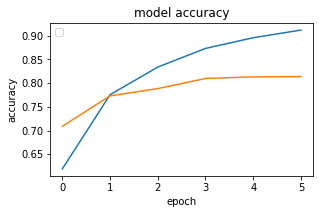

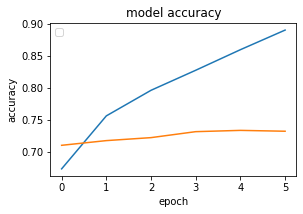

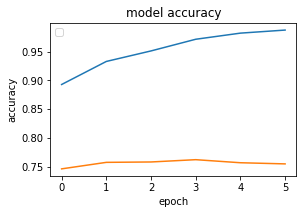

In [59]:
for i in range(3):
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, i+1)
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'test'], loc = 'upper left')
    plt.plot(hist[i].history['accuracy'])
    plt.plot(hist[i].history['val_accuracy'])
    plt.tight_layout(pad=1.0)

plt.show()

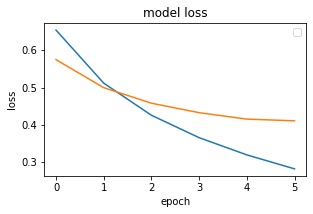

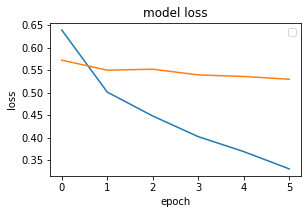

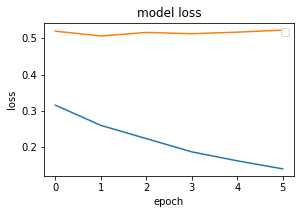

In [60]:
for i in range(3):
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, i+1)
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'test'], loc = 'upper right')
    plt.plot(hist[i].history['loss'])
    plt.plot(hist[i].history['val_loss'])
    plt.tight_layout(pad=1.0)

plt.show()

## Text Classification with LSTM

In [61]:
model = Sequential()
embed_layer = Embedding(
    vocab_size, 100,
    weights = [embed_matrix],
    input_length = maxlen,
    trainable = False
)
model.add(embed_layer)
model.add(LSTM(128))

In [62]:
model.add(
    Dense(
        1,
        activation = 'sigmoid'
    )
)
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

In [63]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          5796100   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 5,913,477
Trainable params: 117,377
Non-trainable params: 5,796,100
_________________________________________________________________


In [64]:
hist = [[]] * 3

for i in range(3):
    hist[i] = model.fit(
        X_train[i], y_train[i],
        batch_size = 128,
        epochs = 6,
        verbose = 1,
        validation_split = 0.2
    )

Epoch 1/6
47/47 [==============================] - 11s 235ms/step - loss: 0.6452 - acc: 0.6195 - val_loss: 0.5662 - val_acc: 0.7267
Epoch 2/6
47/47 [==============================] - 10s 223ms/step - loss: 0.5383 - acc: 0.7312 - val_loss: 0.4911 - val_acc: 0.7713
Epoch 3/6
47/47 [==============================] - 11s 232ms/step - loss: 0.4894 - acc: 0.7670 - val_loss: 0.4677 - val_acc: 0.7753
Epoch 4/6
47/47 [==============================] - 11s 226ms/step - loss: 0.4714 - acc: 0.7770 - val_loss: 0.4526 - val_acc: 0.7940
Epoch 5/6
47/47 [==============================] - 11s 224ms/step - loss: 0.4440 - acc: 0.7877 - val_loss: 0.4347 - val_acc: 0.8080
Epoch 6/6
47/47 [==============================] - 11s 232ms/step - loss: 0.4583 - acc: 0.7857 - val_loss: 0.5533 - val_acc: 0.7120
Epoch 1/6
47/47 [==============================] - 11s 234ms/step - loss: 0.6353 - acc: 0.6613 - val_loss: 0.6286 - val_acc: 0.6867
Epoch 2/6
47/47 [==============================] - 11s 225ms/step - loss: 0.

In [65]:
loss = [[]] * 3
acc = [[]] * 3

for i in range(3):
    loss[i], acc[i] = model.evaluate(
        X_train[i], y_train[i],
        verbose = 1
    )

for i in range(3):
    print('\ndataset {}: loss - {}, acc - {}'.format(i+1, loss[i], acc[i]))

235/235 [==============================] - 10s 44ms/step - loss: 0.5390 - acc: 0.7317

dataset 1: loss - 0.4520241320133209, acc - 0.7954666614532471

dataset 2: loss - 0.6222530007362366, acc - 0.6546666622161865

dataset 3: loss - 0.5390162467956543, acc - 0.7317333221435547


In [66]:
loss = [[]] * 3
acc = [[]] * 3

for i in range(3):
    loss[i], acc[i] = model.evaluate(
        X_test[i], y_test[i],
        verbose = 1
    )
    
for i in range(3):
    print('\ndataset {}: loss - {}, acc - {}'.format(i+1, loss[i], acc[i]))

79/79 [==============================] - 4s 46ms/step - loss: 0.5504 - acc: 0.7200

dataset 1: loss - 0.48068588972091675, acc - 0.774399995803833

dataset 2: loss - 0.6306218504905701, acc - 0.6399999856948853

dataset 3: loss - 0.5504348874092102, acc - 0.7200000286102295


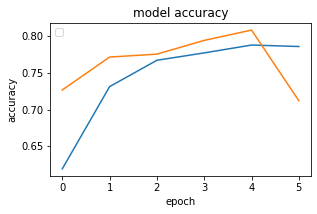

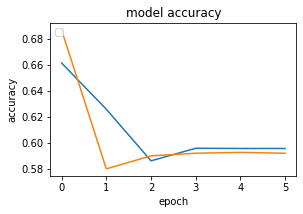

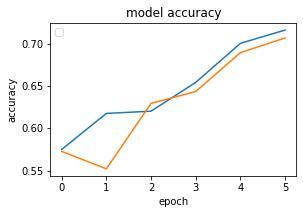

In [67]:
for i in range(3):
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, i+1)
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'test'], loc = 'upper left')
    plt.plot(hist[i].history['acc'])
    plt.plot(hist[i].history['val_acc'])
    plt.tight_layout(pad=1.0)

plt.show()

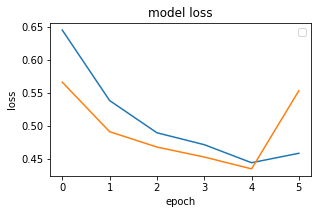

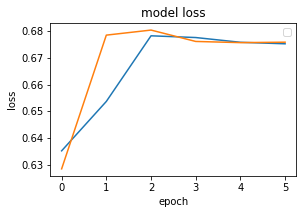

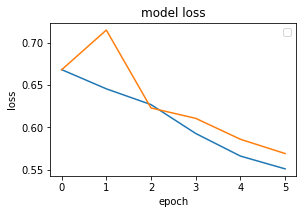

In [68]:
for i in range(3):
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, i+1)
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'test'], loc = 'upper right')
    plt.plot(hist[i].history['loss'])
    plt.plot(hist[i].history['val_loss'])
    plt.tight_layout(pad=1.0)

plt.show()

## Text Classification with Bi-Directional LSTM

In [101]:
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

model = Sequential()
embed_layer = Embedding(
    vocab_size,
    100,
    weights = [embed_matrix],
    input_length = maxlen,
    trainable = False
)
model.add(embed_layer)
model.add(
    Bidirectional(
        LSTM(
            100,
            return_sequences = True,
            dropout = 0.50
        ),
        merge_mode = 'concat'
    )
)
model.add(
    TimeDistributed(
        Dense(
            100,
            activation = 'sigmoid'
        )
    )
)
model.add(Flatten())

In [102]:
model.add(
    Dense(
        100,
        activation = 'sigmoid'
    )
)
model.add(
    Dense(
        3,
        activation = 'softmax'
    )
)
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

In [103]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 100, 100)          5796100   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 100, 200)          160800    
_________________________________________________________________
time_distributed_4 (TimeDist (None, 100, 100)          20100     
_________________________________________________________________
flatten_5 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               1000100   
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 303       
Total params: 6,977,403
Trainable params: 1,181,303
Non-trainable params: 5,796,100
____________________________________

In [1]:
hist = [[]] * 3

for i in range(3):
    hist[i] = model.fit(
        X_train[i], y_train[i],
        batch_size = 128,
        epochs = 6,
        verbose = 1,
        validation_split = 0.2
    )

NameError: name 'model' is not defined

In [73]:
loss = [[]] * 3
acc = [[]] * 3

for i in range(3):
    loss[i], acc[i] = model.evaluate(
        X_train[i], y_train[i],
        verbose = 1
    )

for i in range(3):
    print('\ndataset {}: loss - {}, acc - {}'.format(i+1, loss[i], acc[i]))

235/235 [==============================] - 9s 40ms/step - loss: 0.7691 - acc: 0.4649

dataset 1: loss - 0.7518537640571594, acc - 0.49266666173934937

dataset 2: loss - 0.6983428597450256, acc - 0.5774666666984558

dataset 3: loss - 0.7691359519958496, acc - 0.4649333357810974


In [74]:
loss = [[]] * 3
acc = [[]] * 3

for i in range(3):
    loss[i], acc[i] = model.evaluate(
        X_test[i], y_test[i],
        verbose = 1
    )
    
for i in range(3):
    print('\ndataset {}: loss - {}, acc - {}'.format(i+1, loss[i], acc[i]))

79/79 [==============================] - 3s 38ms/step - loss: 0.7592 - acc: 0.4752

dataset 1: loss - 0.760356068611145, acc - 0.4968000054359436

dataset 2: loss - 0.6879917979240417, acc - 0.5920000076293945

dataset 3: loss - 0.7592472434043884, acc - 0.47519999742507935


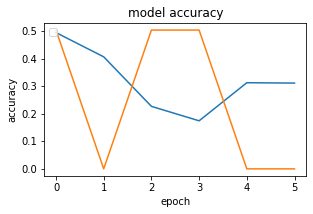

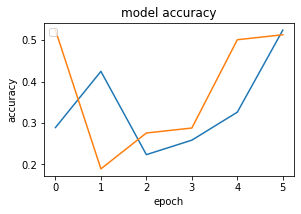

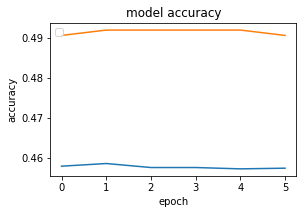

In [75]:
for i in range(3):
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, i+1)
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'test'], loc = 'upper left')
    plt.plot(hist[i].history['acc'])
    plt.plot(hist[i].history['val_acc'])
    plt.tight_layout(pad=1.0)

plt.show()

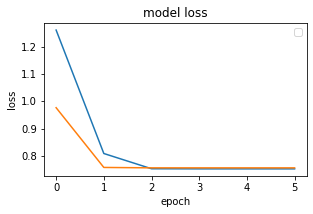

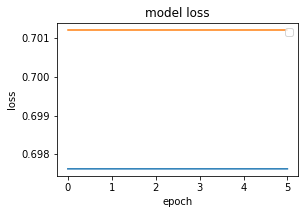

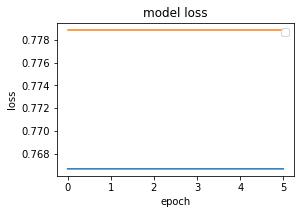

In [76]:
for i in range(3):
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, i+1)
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'test'], loc = 'upper right')
    plt.plot(hist[i].history['loss'])
    plt.plot(hist[i].history['val_loss'])
    plt.tight_layout(pad=1.0)

plt.show()

## Text Classification with GRU

In [77]:
from keras.layers.recurrent import GRU

In [82]:
model = Sequential()
embed_layer = Embedding(
    vocab_size, 100,
    weights = [embed_matrix],
    input_length = maxlen,
    trainable = False
)
model.add(embed_layer)
model.add(
    GRU(256)
)

In [83]:
model.add(
    Dense(
        1,
        activation = 'sigmoid'
    )
)
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

In [80]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          5796100   
_________________________________________________________________
gru (GRU)                    (None, 1024)              3459072   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1025      
Total params: 9,256,197
Trainable params: 3,460,097
Non-trainable params: 5,796,100
_________________________________________________________________


In [84]:
hist = [[]] * 3

for i in range(3):
    hist[i] = model.fit(
        X_train[i], y_train[i],
        batch_size = 128,
        epochs = 6,
        verbose = 1,
        validation_split = 0.2
    )

Epoch 1/6
47/47 [==============================] - 20s 422ms/step - loss: 0.6553 - acc: 0.6068 - val_loss: 0.6120 - val_acc: 0.6713
Epoch 2/6
47/47 [==============================] - 21s 444ms/step - loss: 0.5447 - acc: 0.7278 - val_loss: 0.4431 - val_acc: 0.8027
Epoch 3/6
47/47 [==============================] - 21s 443ms/step - loss: 0.4692 - acc: 0.7792 - val_loss: 0.4714 - val_acc: 0.7813
Epoch 4/6
47/47 [==============================] - 21s 442ms/step - loss: 0.4357 - acc: 0.8017 - val_loss: 0.3979 - val_acc: 0.8267
Epoch 5/6
47/47 [==============================] - 21s 448ms/step - loss: 0.3932 - acc: 0.8242 - val_loss: 0.3944 - val_acc: 0.8307
Epoch 6/6
47/47 [==============================] - 21s 454ms/step - loss: 0.3715 - acc: 0.8335 - val_loss: 0.4261 - val_acc: 0.7947
Epoch 1/6
47/47 [==============================] - 20s 436ms/step - loss: 0.6812 - acc: 0.5742 - val_loss: 0.6824 - val_acc: 0.5733
Epoch 2/6
47/47 [==============================] - 19s 413ms/step - loss: 0.

In [85]:
loss = [[]] * 3
acc = [[]] * 3

for i in range(3):
    loss[i], acc[i] = model.evaluate(
        X_train[i], y_train[i],
        verbose = 1
    )

for i in range(3):
    print('\ndataset {}: loss - {}, acc - {}'.format(i+1, loss[i], acc[i]))

235/235 [==============================] - 18s 78ms/step - loss: 0.3990 - acc: 0.8172

dataset 1: loss - 0.3286373019218445, acc - 0.8659999966621399

dataset 2: loss - 0.611741840839386, acc - 0.6854666471481323

dataset 3: loss - 0.39899224042892456, acc - 0.8172000050544739


In [86]:
loss = [[]] * 3
acc = [[]] * 3

for i in range(3):
    loss[i], acc[i] = model.evaluate(
        X_test[i], y_test[i],
        verbose = 1
    )
    
for i in range(3):
    print('\ndataset {}: loss - {}, acc - {}'.format(i+1, loss[i], acc[i]))

79/79 [==============================] - 6s 73ms/step - loss: 0.5320 - acc: 0.7408

dataset 1: loss - 0.47061043977737427, acc - 0.8068000078201294

dataset 2: loss - 0.6372184753417969, acc - 0.6643999814987183

dataset 3: loss - 0.5320340394973755, acc - 0.7408000230789185


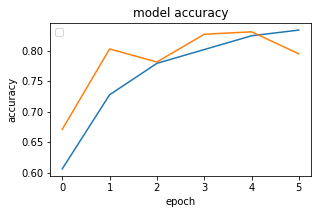

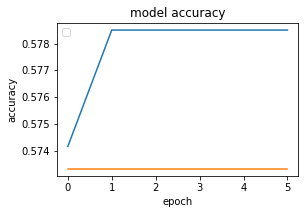

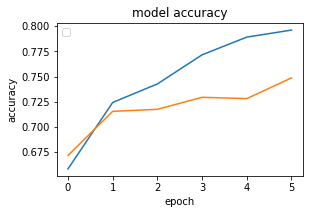

In [87]:
for i in range(3):
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, i+1)
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'test'], loc = 'upper left')
    plt.plot(hist[i].history['acc'])
    plt.plot(hist[i].history['val_acc'])
    plt.tight_layout(pad=1.0)

plt.show()

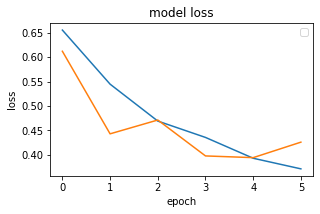

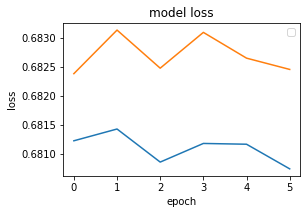

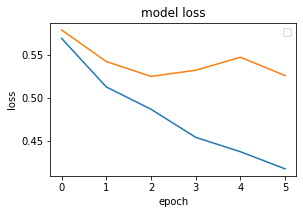

In [88]:
for i in range(3):
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, i+1)
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'test'], loc = 'upper right')
    plt.plot(hist[i].history['loss'])
    plt.plot(hist[i].history['val_loss'])
    plt.tight_layout(pad=1.0)

plt.show()

In [89]:
model.save('model.m5')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model.m5/assets
